# Lab 1: Benchmarking Insertion and Selection Sort
> Date: 09/12/2024
> Author: Leigh Goetsch
> Class: CSC3310
> ### Learning Outcomes
> - Learn how to write benchmarks in Python
> - Implement iterative sorting algorithms such as insertion sort and selection sort
> - Apply asymptotic time complexity analysis to choose among competing algorithms

## Introduction
This lab focuses on benchmarking two sorting algorithms: insertion sort and selection sort. The goal is to compare the run time of the two algorithms with the best, worst, and average case scenarios. 

## Sorting Algorithms
### Insertion Sort

In [1]:
def insertion_sort(lst):
    '''
    Function takes a Python list and sorts it in place
    using the insertion sort algorithm.
    '''
    # starting from the second element, iterate over the list
    for i in range(1, len(lst)):
        # store current element as key
        key = lst[i]
        j = i - 1
        # if the element is greater than key, move right
        while j >= 0 and key < lst[j]:
            lst[j + 1] = lst[j]
            j -= 1
        # insert key in correct position
        lst[j + 1] = key
    return lst

### Selection Sort

In [2]:
def selection_sort(lst):
    '''
    Function takes a Python list and sorts it in place
    using the selection sort algorithm.
    '''
    for i in range(len(lst)):
        # find the min element in the remaining unsorted list
        min_idx = i

        # iterate over the remaining unsorted list to find the minimum
        for j in range(i + 1, len(lst)):
            if lst[j] < lst[min_idx]:
                min_idx = j
        # swap minimum element with the first element
        lst[i], lst[min_idx] = lst[min_idx], lst[i]

    return lst

### Sorting Algorithm Tests

In [3]:
lst = [64, 34, 25, 12, 22, 11, 90]
sorted_lst = [11, 12, 22, 25, 34, 64, 90]
rev_lst = [90, 11, 22, 12, 25, 34, 64]

assert insertion_sort(lst.copy()) == sorted_lst
assert selection_sort(lst.copy()) == sorted_lst

assert insertion_sort(rev_lst.copy()) == sorted_lst
assert selection_sort(rev_lst.copy()) == sorted_lst

print("All tests passed!")

All tests passed!


## Benchmark Function

In [4]:
import time

def benchmark(sorting_alogorithm, input_list):
    '''
    Function takes a reference to a sorting function and 
    the list to sort. It returns the elapsed time in seconds.
    '''
    # DO ANY SETUP
    input_list = input_list.copy()
    start_time = time.perf_counter()
    sorting_alogorithm(input_list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

## Executing Benchmarks
Perform the three run-time cases for each algorithm on at least 5 list sizes. 

In [5]:
# set up benchmarking lists
import random

# sizes of lists to benchmark
list_sizes = [100, 500, 1000, 5000, 10000, 25000, 50000]

# list cases to benchmark
benchmark_lists = {
    "best" : [list(range(n)) for n in list_sizes],
    "worst" : [list(range(n, 0, -1)) for n in list_sizes],
    "average" : [random.sample(range(n), n) for n in list_sizes]
}

# store benchmark results
benchmark_results = {
    insertion_sort : {k: [] for k, v in benchmark_lists.items()},
    selection_sort : {k: [] for k, v in benchmark_lists.items()}
}

# run benchmarks
for case, lst in benchmark_lists.items():
    for algo in benchmark_results.keys():
        print(f"Running {algo.__name__} on {case} case")
        benchmark_results[algo][case] = [benchmark(algo, lst) for lst in benchmark_lists[case]]


Running insertion_sort on best case
Running selection_sort on best case
Running insertion_sort on worst case
Running selection_sort on worst case
Running insertion_sort on average case
Running selection_sort on average case


## Validating Formal Run Times
### Slope Functions

In [6]:
import numpy as np
from scipy.stats import linregress

# fit a linear regression model to the log of the list
# sizes (s) and run times (r) to estimate the slope (m)
# log r = m log s + b

def estimate_slope(list_sizes, run_times):
    '''
    Function takes a list of list sizes and a list of run times
    and returns the slope of the linear regression model.
    '''
    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m


def get_complexity(m):
    '''
    Function takes the slope of the linear regression model
    and returns the complexity of the algorithm.
    '''
    if m == 0:
        return "Constant"
    elif m < 1:
        return "Sub-linear (e.g., log n)"
    elif m == 1:
        return "Linear"
    elif m > 1 and m < 2:
        return "Between linear and quadratic (e.g., n log n)"
    elif m == 2:
        return "Quadratic (e.g., n^2)"
    elif m > 2 and m < 3:
        return "Between quadratic and cubic (e.g., n^2 log n)"
    elif m == 3:
        return "Cubic (e.g., n^3)"
    else:
        return "Out of Scope"

### Run Time Analysis

In [7]:
# Validate the the formal run time complexity of the algorithms
for algo, results in benchmark_results.items():
    print(f"Algorithm: {algo.__name__}")
    for case, run_times in results.items():
        m = estimate_slope(list_sizes, run_times)
        complexity = get_complexity(m)
        print(f"Case: {case}")
        print(f"Estimated Slope: {m}")
        print(f"Complexity: {complexity}")
        print()

Algorithm: insertion_sort
Case: best
Estimated Slope: 1.0048306395068056
Complexity: Between linear and quadratic (e.g., n log n)

Case: worst
Estimated Slope: 2.0260041103415505
Complexity: Between quadratic and cubic (e.g., n^2 log n)

Case: average
Estimated Slope: 2.0229471402322416
Complexity: Between quadratic and cubic (e.g., n^2 log n)

Algorithm: selection_sort
Case: best
Estimated Slope: 2.1083797828613773
Complexity: Between quadratic and cubic (e.g., n^2 log n)

Case: worst
Estimated Slope: 2.0105755500030367
Complexity: Between quadratic and cubic (e.g., n^2 log n)

Case: average
Estimated Slope: 2.027511075688815
Complexity: Between quadratic and cubic (e.g., n^2 log n)



## Comparative Analysis of Algorithm Run Times
Make the following comparisons:
- Compare run times of the three cases within each algorithm
- Compare run times of each case across all of the algorithms

### Run Time for Each Algorithm

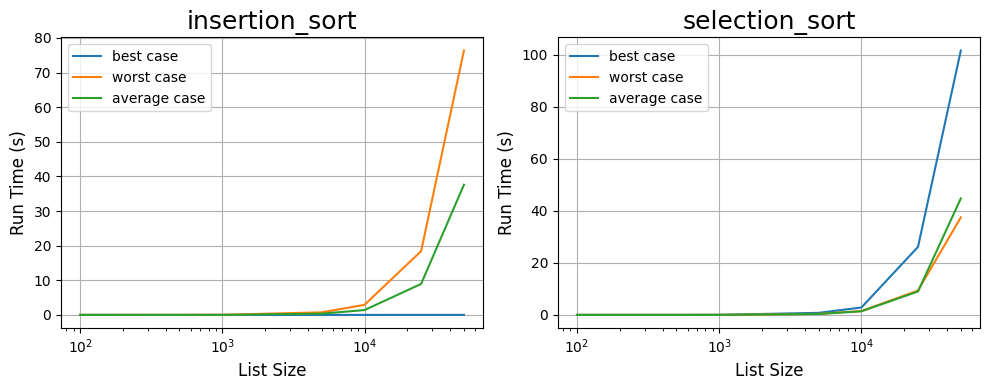

In [8]:
import matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(10, 4))
# plot by algorithm
for i, (algo, results) in enumerate(benchmark_results.items()):
    plt.subplot(1, 2, i + 1)
    plt.grid(True)
    plt.xscale("log")
    plt.xlabel("List Size", fontsize=12)
    plt.ylabel("Run Time (s)", fontsize=12)
    plt.title(f"{algo.__name__}", fontsize=18)
    for case, times in results.items():
        plt.plot(list_sizes, times, label=f"{case} case")
    plt.legend()
plt.tight_layout()


### Run Time for Each Case

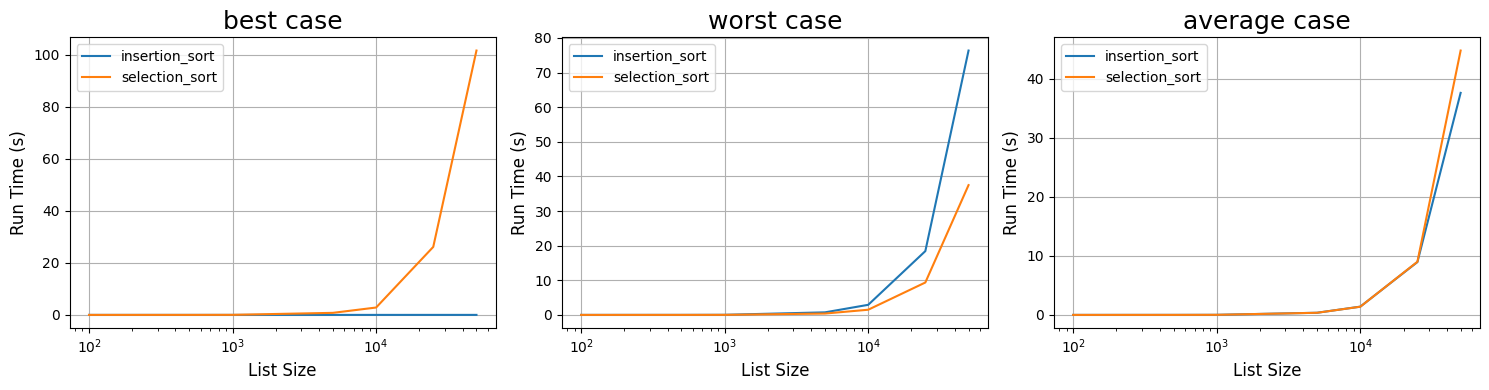

In [9]:

plt.subplots(1, 3, figsize=(15, 4))
# plot by case
for i, (algo, results) in enumerate(benchmark_results.items()):
    for j , (case, times) in enumerate(results.items()):
        plt.subplot(1, 3, j + 1)
        plt.grid(True)
        plt.xscale("log")
        # plt.yscale("log")
        plt.xlabel("List Size", fontsize=12)
        plt.ylabel("Run Time (s)", fontsize=12)
        plt.title(f"{case} case", fontsize=18)
        plt.plot(list_sizes, times, label=f"{algo.__name__}")
        plt.legend()
plt.tight_layout()

## Reflection Questions

1. Create a table of the theoretical and estimated run time functions for the 6 combinations (2 algorithms, 3 cases). Do your estimates match the theory? (If not, you may have made a mistake somewhere.)

| Algorithm          | Case         | Time Complexity | Estimated Run Time                           |
| ------------------ | ------------ | --------------- | -------------------------------------------- |
| **Insertion Sort** | Best Case    | n               | Between linear and quadratic (nearly linear) |
|                    | Average Case | n²              | Between quadratic and cubic                  |
|                    | Worst Case   | n²              | Between quadratic and cubic                  |
| **Selection Sort** | Best Case    | n²              | Between quadratic and cubic                  |
|                    | Average Case | n²              | Between quadratic and cubic                  |
|                    | Worst Case   | n²              | Between quadratic and cubic                  |

I calculated the estimated run times for the best case of insertion sort because it only needs to check if the current element is less than the previous element.

I calculated the estimated run times for the average and worst cases of insertion sort and all cases of selection sort because they both have nested loops that iterate over the entire list. This results in a quadratic time complexity, so the estimated run times are between quadratic and cubic.

My estimates match the theory because the run times for the best case of insertion sort are nearly linear, and the run times for the average and worst cases of insertion sort and all cases of selection sort are between quadratic and cubic.

2. Which algorithm had a better run time than the other and for which case? Why do you think that one case was substantially faster for that algorithm? (Hint: focus on the inner loops.)

Insertion sort had a better run time than selection sort for the best case. 

In the best case of insertion sort, the inner loop only needs to check if the current element is less than the previous element. It was substantially faster because it only loops through the list once in the best case. 

Selection sort performs better in the worst case because it has a fixed number of comparisons for each element, regardless of the order of the elements.

1. Based on your results, which of the two sorting algorithms would you use in practice?

I would use insertion sort in practice because it performs better than selection sort in the best case and the same in the worst and average cases. Because insertion sort is nearly linear in the best case, it is more efficient than selection sort for nearly sorted lists.

Insertion sort is also easier to implement and understand than selection sort, which makes it a better choice for practical use.
